# Human Melanoma Gene Expression

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

## Import Data

In [43]:
data = pd.read_csv('Human_Melanomas_tidy.csv', index_col=0, usecols=range(2,10))
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(40592, 7)


,A2058,A375,C32,Malme3M,SKMEL28,SKMEL5,WM2664
Gene Name,,,,,,,
TSPAN6,26.0,27.0,8.0,27.0,30.0,48.0,36.0
DPM1,186.0,417.0,220.0,149.0,266.0,128.0,146.0
SCYL3,11.0,13.0,6.0,8.0,6.0,5.0,7.0
C1orf112,25.0,23.0,8.0,13.0,25.0,4.0,14.0
FGR,0.0,0.0,0.0,20.0,0.0,0.0,0.0


In [44]:
data_array = data.values
print (data_array.shape)

(40592, 7)


## Compute Distance

In [ ]:
data_dist = pdist(data_array) # computing the distance
data_link = linkage(data_array, 'ward') # computing the linkage

## Dendrogram

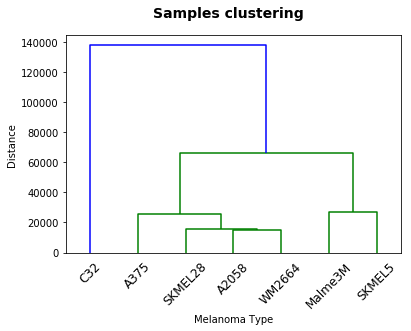

In [40]:
dendrogram(data_link, labels= list(data), leaf_rotation=45.0)
plt.xlabel('Melanoma Type')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);

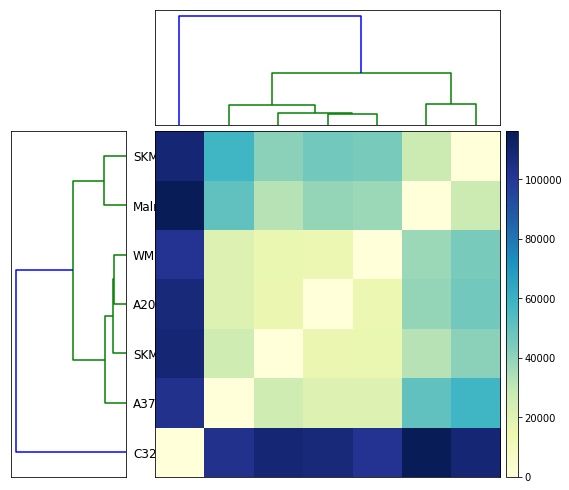

In [41]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='ward')
Z1 = dendrogram(Y, orientation='left',labels=list(data)) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)